In [ ]:
# first neural network model with keras tutorial
#!pip install keras
#!pip install tensorflow 
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import pandas as pd


In [ ]:
# load the dataset
gt=pd.read_csv("gas_turbines.csv")

In [ ]:
gt.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [ ]:
gt.shape

(15039, 11)

In [ ]:
gt.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
gt.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
# check for duplicate data
duplicate = gt.duplicated()
print(duplicate.sum())

0


In [ ]:
gt[duplicate]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AT'>

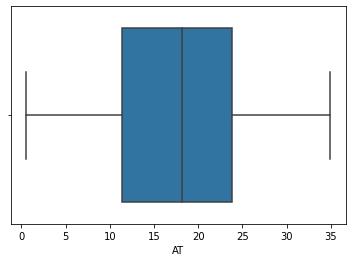

In [ ]:
## Data Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(gt['AT'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AP'>

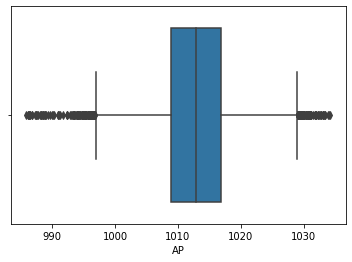

In [ ]:
sns.boxplot(gt['AP'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AH'>

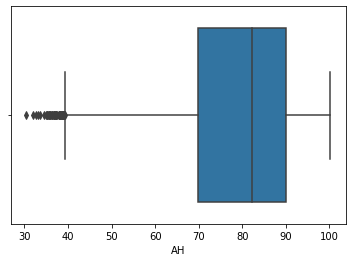

In [ ]:
sns.boxplot(gt['AH'])

<AxesSubplot:>

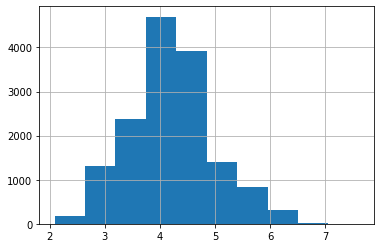

In [ ]:
gt.AFDP.hist()

<AxesSubplot:>

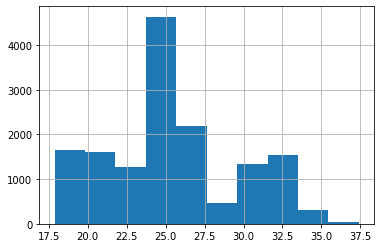

In [ ]:
gt.GTEP.hist()

<AxesSubplot:>

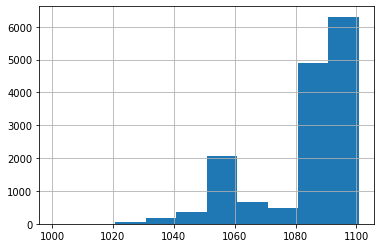

In [ ]:
gt.TIT.hist()

<AxesSubplot:>

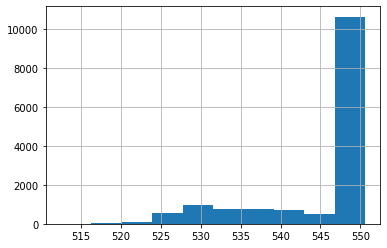

In [ ]:
gt.TAT.hist()

<AxesSubplot:>

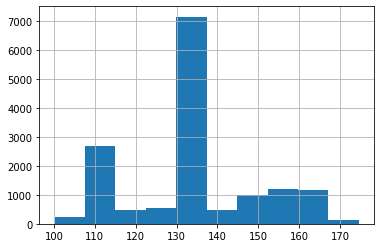

In [ ]:
gt["TEY"].hist()

<AxesSubplot:>

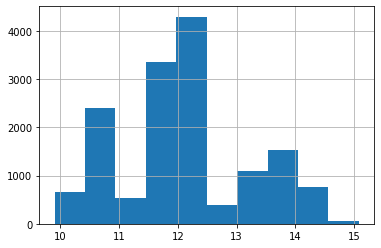

In [ ]:
gt['CDP'].hist()

<AxesSubplot:>

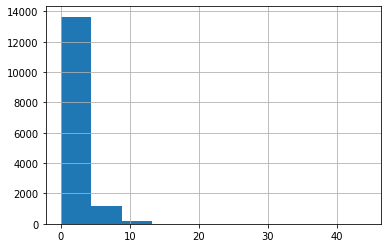

In [ ]:
gt['CO'].hist()

<AxesSubplot:>

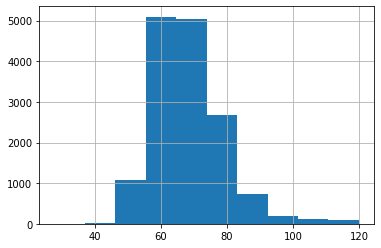

In [ ]:
gt.NOX.hist()

In [ ]:
## Correlation between variables
corr=gt.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

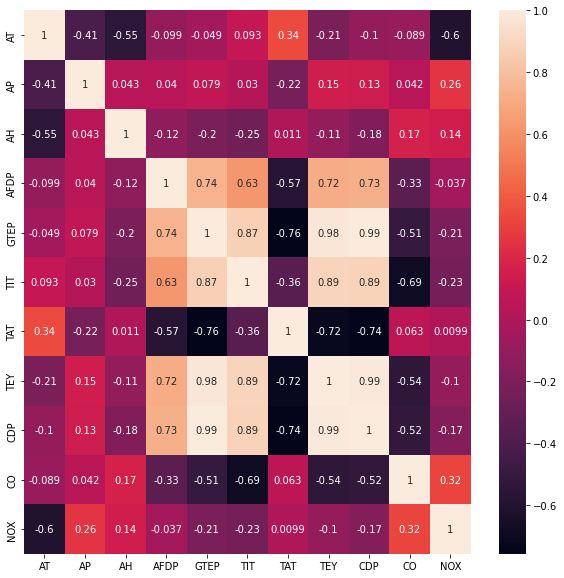

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

In [ ]:
## As per above results , we can see TEY has strong positive correlation with CDP, TIT,GTEP,AFDP and negative correlation with TAT variables

In [ ]:
# Split the dataset into X, Y variables 
X = gt.loc[:,['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','NOX']]
Y= gt.loc[:,['TEY']]

In [ ]:
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [ ]:
Y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler 
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X) 
a.fit(Y)
y=a.transform(Y)

In [ ]:
X_standardized

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [ ]:
y

array([[-1.23117246],
       [-1.22990897],
       [-1.23054071],
       ...,
       [-1.5160891 ],
       [-1.48134317],
       [-1.42827666]])

In [ ]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.25)

Neural Network Model

In [ ]:
# define model
model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = SGD(learning_rate=0.01, momentum=0.9)

In [ ]:
model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])

In [ ]:
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)

Epoch 1/100
1128/1128 [==============================] - 3s 3ms/step - loss: 0.0543 - mse: 0.0062 - val_loss: 0.0505 - val_mse: 0.0054
Epoch 2/100
1128/1128 [==============================] - 3s 3ms/step - loss: 0.0544 - mse: 0.0062 - val_loss: 0.0411 - val_mse: 0.0029
Epoch 3/100
1128/1128 [==============================] - 2s 2ms/step - loss: 0.0504 - mse: 0.0052 - val_loss: 0.0836 - val_mse: 0.0167
Epoch 4/100
1128/1128 [==============================] - 2s 2ms/step - loss: 0.0536 - mse: 0.0058 - val_loss: 0.0625 - val_mse: 0.0080
Epoch 5/100
1128/1128 [==============================] - 3s 3ms/step - loss: 0.0508 - mse: 0.0053 - val_loss: 0.0438 - val_mse: 0.0033
Epoch 6/100
1128/1128 [==============================] - 2s 2ms/step - loss: 0.0493 - mse: 0.0050 - val_loss: 0.0480 - val_mse: 0.0033
Epoch 7/100
1128/1128 [==============================] - 3s 2ms/step - loss: 0.0474 - mse: 0.0047 - val_loss: 0.0347 - val_mse: 0.0024
Epoch 8/100
1128/1128 [==============================] 

In [ ]:
# evaluate the model
_, train_mse = model.evaluate(X_train, y_train, verbose=0)
_, test_mse = model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))


Train: 0.003, Test: 0.003


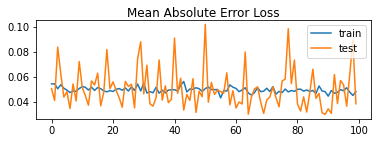

In [ ]:
# plot loss during training
plt.subplot(211)
plt.title('Mean Absolute Error Loss', pad=-20)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

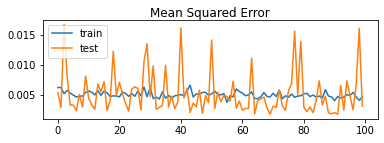

In [ ]:
# plot mse during training
plt.subplot(212)
plt.title('Mean Squared Error', pad=-20)
plt.plot(history.history['mse'], label='train')
plt.plot(history.history['val_mse'], label='test')
plt.legend()
plt.show()

# Tuning of Hyperparameters :-

In [ ]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam, SGD

Tuning of Hyperparameters :- Batch Size and Epochs 

In [ ]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=10, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))
    
    opt=SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
    return model


In [ ]:

# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y) 

<ipython-input-48-667c3eb697bb>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=50....................................
[CV 1/5; 1/9] END ....batch_size=10, epochs=50;, score=-0.081 total time= 2.4min
[CV 2/5; 1/9] START batch_size=10, epochs=50....................................
[CV 2/5; 1/9] END ....batch_size=10, epochs=50;, score=-0.032 total time= 1.5min
[CV 3/5; 1/9] START batch_size=10, epochs=50....................................
[CV 3/5; 1/9] END ....batch_size=10, epochs=50;, score=-0.042 total time= 2.4min
[CV 4/5; 1/9] START batch_size=10, epochs=50....................................
[CV 4/5; 1/9] END ....batch_size=10, epochs=50;, score=-0.066 total time= 2.4min
[CV 5/5; 1/9] START batch_size=10, epochs=50....................................
[CV 5/5; 1/9] END ....batch_size=10, epochs=50;, score=-0.098 total time= 2.4min
[CV 1/5; 2/9] START batch_size=10, epochs=100...................................
[CV 1/5; 2/9] END ...batch_size=10, epochs=100;, 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.03541927449405193, using {'batch_size': 20, 'epochs': 100}
-0.06377664282917976,0.02426882292506102 with: {'batch_size': 10, 'epochs': 50}
-0.04526148252189159,0.011679011268448052 with: {'batch_size': 10, 'epochs': 100}
-0.0642245352268219,0.02156374773739709 with: {'batch_size': 10, 'epochs': 150}
-0.03905404582619667,0.008593706619502742 with: {'batch_size': 20, 'epochs': 50}
-0.03541927449405193,0.005002232227110561 with: {'batch_size': 20, 'epochs': 100}
-0.04081703759729862,0.00782249184899201 with: {'batch_size': 20, 'epochs': 150}
-0.03854878842830658,0.005144003010041458 with: {'batch_size': 40, 'epochs': 50}
-0.0384944349527359,0.006261715144507318 with: {'batch_size': 40, 'epochs': 100}
-0.03551451861858368,0.006376296975818379 with: {'batch_size': 40, 'epochs': 150}


##Tuning of Hyperparameters:- Learning rate and Drop out rate

In [ ]:
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(15,input_dim = 10,kernel_initializer = 'he_uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(10,input_dim = 10,kernel_initializer = 'he_uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    opt=SGD(learning_rate=learning_rate, momentum=0.9)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)
 

<ipython-input-51-bec28ef34775>:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.060 total time=  12.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.043 total time=   9.7s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.061 total time=  10.4s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.047 total time=  11.5s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=-0.045 total time=  10.3s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.046971922367811204, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.05122573524713516,0.0075169255354808635 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
-0.046971922367811204,0.010331259604353963 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
-0.20621858537197113,0.06332823347478561 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
-0.12343544811010361,0.02158272244860334 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-0.13750518560409547,0.023133921235740096 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-0.4038767874240875,0.06448989331325844 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.2061060681939125,0.06230062415584942 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-0.20996004045009614,0.06912101454534487 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-0.5011059403419494,0.10255982090228266 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


##Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [ ]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(15,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(10,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    opt=SGD(learning_rate=0.01, momentum=0.9)
    model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','he_uniform']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)


<ipython-input-54-2409ffc75a93>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.046 total time=  10.9s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.050 total time=  10.7s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.050 total time=  10.8s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.041 total time=   9.7s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=-0.060 total time=  10.2s
[CV 1/5; 2/12] START activation_function=softmax, init=norm

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.03586946353316307, using {'activation_function': 'relu', 'init': 'normal'}
-0.049443619698286055,0.0063631130964408615 with: {'activation_function': 'softmax', 'init': 'uniform'}
-0.046635381132364276,0.006313972454161632 with: {'activation_function': 'softmax', 'init': 'normal'}
-0.04519725628197193,0.01670973744891022 with: {'activation_function': 'softmax', 'init': 'he_uniform'}
-0.04901019260287285,0.013363160068886132 with: {'activation_function': 'relu', 'init': 'uniform'}
-0.03586946353316307,0.0053615637289087595 with: {'activation_function': 'relu', 'init': 'normal'}
-0.048670487105846406,0.01179751462330717 with: {'activation_function': 'relu', 'init': 'he_uniform'}
-0.05040455982089043,0.014471493103033296 with: {'activation_function': 'tanh', 'init': 'uniform'}
-0.044667525589466094,0.004234458764933141 with: {'activation_function': 'tanh', 'init': 'normal'}
-0.05017928406596184,0.01270076958931748 with: {'activation_function': 'tanh', 'init': 'he_uniform'}
-0.052

In [ ]:
print(grid_result)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe828f2a670>,
             param_grid={'activation_function': ['softmax', 'relu', 'tanh',
                                                 'linear'],
                         'init': ['uniform', 'normal', 'he_uniform']},
             verbose=10)


##Tuning of Hyperparameter :-Number of Neurons in activation layer

In [ ]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(1,activation = 'linear'))
    
    opt = SGD(learning_rate = 0.01, momentum=0.09)
    model.compile(loss = 'mean_absolute_error',optimizer = opt, metrics = ['mse'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)

# Define the grid search parameters

neuron1 = [5,10,15,20]
neuron2 = [2,5,10,15]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,y)

<ipython-input-57-ebce96bdc0ec>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model,verbose = 0,batch_size = 20,epochs = 10)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START neuron1=5, neuron2=2.......................................
[CV 1/5; 1/16] END .......neuron1=5, neuron2=2;, score=-0.040 total time=  11.5s
[CV 2/5; 1/16] START neuron1=5, neuron2=2.......................................
[CV 2/5; 1/16] END .......neuron1=5, neuron2=2;, score=-0.031 total time=  10.6s
[CV 3/5; 1/16] START neuron1=5, neuron2=2.......................................
[CV 3/5; 1/16] END .......neuron1=5, neuron2=2;, score=-0.038 total time=  10.6s
[CV 4/5; 1/16] START neuron1=5, neuron2=2.......................................
[CV 4/5; 1/16] END .......neuron1=5, neuron2=2;, score=-0.038 total time=  11.5s
[CV 5/5; 1/16] START neuron1=5, neuron2=2.......................................
[CV 5/5; 1/16] END .......neuron1=5, neuron2=2;, score=-0.062 total time=  11.5s
[CV 1/5; 2/16] START neuron1=5, neuron2=5.......................................
[CV 1/5; 2/16] END .......neuron1=5, neuron2=5;,

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param)) 

Best : -0.034141774475574496, using {'neuron1': 15, 'neuron2': 15}
-0.0417239636182785,0.010376785516289294 with: {'neuron1': 5, 'neuron2': 2}
-0.043704576790332794,0.0076083835805578984 with: {'neuron1': 5, 'neuron2': 5}
-0.037311183661222456,0.00497909284869106 with: {'neuron1': 5, 'neuron2': 10}
-0.035120315849781036,0.004274256255503068 with: {'neuron1': 5, 'neuron2': 15}
-0.041737516224384305,0.0017732702583670176 with: {'neuron1': 10, 'neuron2': 2}
-0.03815852366387844,0.005748033420505959 with: {'neuron1': 10, 'neuron2': 5}
-0.03579554930329323,0.007303438812709494 with: {'neuron1': 10, 'neuron2': 10}
-0.037037278339266774,0.00780896494867074 with: {'neuron1': 10, 'neuron2': 15}
-0.050447069108486176,0.016960155763360834 with: {'neuron1': 15, 'neuron2': 2}
-0.03973073326051235,0.008259193358583645 with: {'neuron1': 15, 'neuron2': 5}
-0.03728127777576447,0.007446913006882972 with: {'neuron1': 15, 'neuron2': 10}
-0.034141774475574496,0.007001982309894002 with: {'neuron1': 15, 'neu

##Training model with optimum values of Hyperparameters

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model
model = Sequential()
model.add(Dense(15,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(15,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
model.add(Dropout(0.0))
model.add(Dense(1,activation = 'linear'))
    
opt = SGD(learning_rate = 0.01,momentum=0.09) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(loss = 'mean_absolute_error',optimizer = opt,metrics = ['mse'])
   
# Fitting the model

final_model=model.fit(X_standardized,y,epochs=100, batch_size=20)



Epoch 1/100
752/752 [==============================] - 2s 2ms/step - loss: 0.2821 - mse: 0.3039
Epoch 2/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0402 - mse: 0.0031
Epoch 3/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0358 - mse: 0.0025
Epoch 4/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0344 - mse: 0.0023
Epoch 5/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0335 - mse: 0.0022
Epoch 6/100
752/752 [==============================] - 2s 3ms/step - loss: 0.0326 - mse: 0.0021
Epoch 7/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0322 - mse: 0.0020
Epoch 8/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0317 - mse: 0.0020
Epoch 9/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0311 - mse: 0.0019
Epoch 10/100
752/752 [==============================] - 1s 2ms/step - loss: 0.0309 - mse: 0.0019
Epoch 11/100
752/752 [=================

In [ ]:
# evaluate the model
_, MSE = model.evaluate(X_standardized,y, verbose=0)

# Printing the metrics
print("Mean Square Error : ", MSE)

Mean Square Error :  0.0012869089841842651


In [ ]:
## As per above results, we can see MSE value decreased from 0.003 to 0.0012 by using optimum values in the model.

In [ ]:
import numpy as np
RMSE=np.sqrt(MSE)
RMSE

0.03587351368606461

In [ ]:
print("Root Mean Squared Error : " , RMSE)

Root Mean Squared Error :  0.03587351368606461
